**1(a)**

In [20]:
import numpy as np

def HouseholderQR(A):
    
    '''
    Convert matrix A into an upper triangular matrix by looping over the columns
    and creating zeroes below the diagonal, using reflections. The result is such that
    A = QR

    Input: 
    A, square matrix of dimension n

    Output:
    Q, orthogonal, symmetric matrix of dimension n
    R, non-singular upper-triangular matrix of dimension n
    '''

    # initialise such that Q = I and R = A, all of dimension n
    n = len(A)
    Q = np.eye(n)
    R = np.copy(A)
    
    # loop over all columns of A
    for k in range (1, n):

        # create a set of vectors u using columns of A
        u = R[k-1:, k-1]

        # define variables and then plug into formula for v
        signu1 = np.sign(u[0])
        u_2norm = np.linalg.norm(u)
        e1 = np.eye(n-k+1)[0]
        v = u + signu1 * u_2norm * e1

        # normalise v to find w
        w = v / np.linalg.norm(v)

        # decomposing R
        R11 = R[:k-1,:k-1]
        R12 = R[:k-1,k-1:]
        R21 = np.zeros((n-k+1, k-1))
        R22 = R[k-1:,k-1:]

        # finding R = Q_k @ R
        # only need to consider R22 as all other parts of matrix R are unaffected by Qk

        # use formula for H_k
        x = w @ R22
        H_kR22 = R22 - 2 * np.outer(w, x)

        # now put all sub-matrices back together
        R = np.block([[R11, R12], [R21, H_kR22]])

        # decomposing Q
        Q11 = Q[:k-1,:k-1]
        Q12 = Q[:k-1,k-1:]
        Q21 = Q[k-1:,:k-1]
        Q22 = Q[k-1:,k-1:]
        
        # finding Q = Q @ Q_k
        # Q12 and Q22 are both hit by Qk

        # apply formula for Hk
        y = Q12 @ w
        z = Q22 @ w
        Q12H_k = Q12 - 2 * np.outer(y, w)
        Q22H_k = Q22 - 2 * np.outer(z, w)

        # put matrix Q back together
        Q = np.block([[Q11, Q12H_k], [Q21, Q22H_k]])

    # return QR decomposition of A
    return Q, R


def QRtest(A,QRfun):
    # Test Q R = A and Q^T Q = I for decomposition by function QRfun
    Q, R = QRfun(A)
    print('Q R = A:',np.allclose(Q @ R, A))
    print('Q^T Q = I:',np.allclose(Q.T @ Q,np.eye(A.shape[0])))

# Test QR for a random matrix
A = np.random.randn(4,4)
QRtest(A,HouseholderQR)

Q R = A: True
Q^T Q = I: True


**1(b)**

1. $\mathbf{z}^\T \mathbf{w} = \mathbf{z}^\T(\mathbf{e}_1 - z_1\mathbf{z}) / \|\mathbf{v}\|_2 = (z_1 - z_1 \mathbf{z}^\T\mathbf{z}) / \|\mathbf{v}\|_2 = (\cos \theta  - \|\mathbf{z}\|_2 \cos \theta ) / \|\mathbf{v}\|_2$

    and because $\mathbf{z} = \mathbf{u}/\|\mathbf{u}\|_2$, $\|\mathbf{z}\|_2 = 1$

    so $\mathbf{z}^\T \mathbf{w} = 0$

2. $\|\mathbf{v}\|_2 = \|\mathbf{e}_1 - z_1 \mathbf{z}\|_2 = \sqrt{(\mathbf{e}_1 - z_1 \mathbf{z})^\T(\mathbf{e}_1 - z_1 \mathbf{z})} = \sqrt{1 - 2\cos^2 \theta + \cos^2 \theta} = \sqrt{1-z_1^2} = \sin \theta$
3. $\cos \theta \, \mathbf{z} + \sin \theta \, \mathbf{w} = \cos \theta \, \mathbf{z} + \sin \theta \, \mathbf{v} / \|\mathbf{v}\|_2 = \cos \theta \, \mathbf{z} + \sin \theta \, (1 - \cos \theta \, \mathbf{z}) / \sin \theta = \mathbf{e}_1$
4. $\mathbf{R}_k \mathbf{u} = \mathbf{u} + (\cos \theta - 1)(\mathbf{z}\mathbf{z}^\T\mathbf{u} + \mathbf{w}\mathbf{w}^\T\mathbf{u}) + \sin \theta \, (\mathbf{w}\mathbf{z}^\T\mathbf{u} - \mathbf{z}\mathbf{w}^\T\mathbf{u})$

    We can find
   
   $\mathbf{z}^\T\mathbf{u} = \mathbf{u}^\T\mathbf{u} / \|\mathbf{u}\|_2 = \|\mathbf{u}\|_2$ and
   
   $\mathbf{w}^\T\mathbf{u} = \mathbf{v}^\T\mathbf{u} / \|\mathbf{v}\|_2 = (\mathbf{e}_1^\T\mathbf{u} - \cos \theta \,\mathbf{z}^\T\mathbf{u}) / \|\mathbf{v}\|_2 = (u_1 - \|\mathbf{u}\|_2\cos \theta) / \|\mathbf{v}\|_2$

   from the definition of $\mathbf{z}$, we have $u_1 = \|\mathbf{u}\|_2z_1 = \|\mathbf{u}\|_2\cos \theta$

   so $\mathbf{w}^\T\mathbf{u} = 0$

   Therefore $\mathbf{R}_k \mathbf{u} = \mathbf{u} + (\cos \theta - 1)\|\mathbf{u}\|_2\mathbf{z} + \sin \theta \, \|\mathbf{u}\|_2\mathbf{w} = \mathbf{u} + \cos \theta \,\|\mathbf{u}\|_2\mathbf{z} - \mathbf{u} + \sin \theta \, \|\mathbf{u}\|_2\mathbf{w} = \cos \theta \,\|\mathbf{u}\|_2\mathbf{z} + \sin \theta \, \|\mathbf{u}\|_2\mathbf{w} = \|\mathbf{u}\|_2\mathbf{e}_1$

5. To find if $\mathbf{R}_k$ is orthogonal, we need $\mathbf{R}_k^\T\mathbf{R}_k = \mathbf{I}$.

   We have $\mathbf{R}_k^\T\mathbf{R}_k = (\mathbf{I} + (\cos \theta-1) (\mathbf{z} \mathbf{z}^\T + \mathbf{w} \mathbf{w}^\T) + \sin \theta (\mathbf{z} \mathbf{w}^\T - \mathbf{w} \mathbf{z}^\T))(\mathbf{I} + (\cos \theta-1) (\mathbf{z} \mathbf{z}^\T + \mathbf{w} \mathbf{w}^\T) + \sin \theta (\mathbf{w} \mathbf{z}^\T - \mathbf{z} \mathbf{w}^\T))$

   $= (\mathbf{I} - (\cos \theta \ - 1)(\mathbf{z} \mathbf{z}^\T + \mathbf{w} \mathbf{w}^\T))^2 + \sin \theta \,(\mathbf{z} \mathbf{w}^\T - \mathbf{w} \mathbf{z}^\T)(\mathbf{I} + (\cos \theta-1) (\mathbf{z} \mathbf{z}^\T + \mathbf{w} \mathbf{w}^\T)) + \sin \theta \,(\mathbf{w} \mathbf{z}^\T - \mathbf{z} \mathbf{w}^\T)(\mathbf{I} - (\cos \theta \ - 1)(\mathbf{z} \mathbf{z}^\T + \mathbf{w} \mathbf{w}^\T)) + \sin^2 \theta (\mathbf{z} \mathbf{w}^\T - \mathbf{w} \mathbf{z}^\T)(\mathbf{w} \mathbf{z}^\T - \mathbf{z} \mathbf{w}^\T)$

   We know that $\mathbf{w}^\T \mathbf{z} = \mathbf{z}^\T \mathbf{w} = 0$, and $\mathbf{z}^\T \mathbf{z} = \mathbf{w}^\T \mathbf{w} = 1$, so we can use this to simplify:

   $(\mathbf{z} \mathbf{z}^\T + \mathbf{w} \mathbf{w}^\T)^2 = \mathbf{z} \mathbf{z}^\T + \mathbf{w} \mathbf{w}^\T$

   $(\mathbf{z} \mathbf{w}^\T - \mathbf{w} \mathbf{z}^\T)(\mathbf{w} \mathbf{z}^\T - \mathbf{z} \mathbf{w}^\T) = \mathbf{z} \mathbf{z}^\T + \mathbf{w} \mathbf{w}^\T$

   $(\mathbf{z} \mathbf{w}^\T - \mathbf{w} \mathbf{z}^\T)(\mathbf{z} \mathbf{z}^\T + \mathbf{w} \mathbf{w}^\T) = \mathbf{z} \mathbf{w}^\T - \mathbf{w} \mathbf{z}^\T$

   $(\mathbf{w} \mathbf{z}^\T - \mathbf{z} \mathbf{w}^\T)(\mathbf{z} \mathbf{z}^\T + \mathbf{w} \mathbf{w}^\T) = \mathbf{w} \mathbf{z}^\T - \mathbf{z} \mathbf{w}^\T$

   We get $\mathbf{R}_k^\T\mathbf{R}_k = \mathbf{I}$.

**1(c)**

In [21]:
import numpy as np

def RotationQR(A):
    
    '''
    Convert matrix A into an upper triangular matrix by looping over the columns
    and creating zeroes below the diagonal, using rotations. The result is such that
    A = QR

    Input: 
    A, square matrix of dimension n

    Output:
    Q, orthogonal matrix of dimension n
    R, non-singular upper-triangular matrix of dimension n
    '''

    # initialise such that Q = I and R = A, all of dimension n
    n = len(A)
    Q = np.eye(n,n)
    R = np.copy(A)
    
    # loop over columns of A
    for k in range (1, n):

        # create a set of vectors u using columns of A
        u = R[k-1:, k-1]

        # normalise u to find z
        z = u / np.linalg.norm(u)

        # define variables and then plug into formula for v
        e1 = np.eye(n-k+1)[0]
        v = e1 - z[0] * z
        
        # normalise v to find w
        w = v / np.linalg.norm(v)

        # decomposing R
        R11 = R[:k-1,:k-1]
        R12 = R[:k-1,k-1:]
        R21 = np.zeros((n-k+1, k-1))
        R22 = R[k-1:,k-1:]

        # finding R = Q_k @ R
        # apply formula for R_k
        zR22 = z @ R22
        wR22 = w @ R22
        R_kR22 = R22 + (z[0] - 1) * (np.outer(z, zR22) + np.outer(w, wR22)) + np.sqrt(1 - z[0] ** 2) * (np.outer(w, zR22) - np.outer(z, wR22))
        R = np.block([[R11, R12], [R21, R_kR22]])

        # decomposing Q_k
        Q11 = Q[:k-1,:k-1]
        Q12 = Q[:k-1,k-1:]
        Q21 = Q[k-1:,:k-1]
        Q22 = Q[k-1:,k-1:]
        
        # finding Q = Q @ Q_k.T
        # Q_k is orthogonal but not symmetric, so Qk.T = invQk

        # use outer product instead of MM to find Q12 @ R_k.T
        Q12z = Q12 @ z
        Q12w = Q12 @ w
        Q12R_kT = Q12 + (z[0] - 1) * (np.outer(Q12z, z) + np.outer(Q12w, w)) + np.sqrt(1 - z[0] ** 2) * (np.outer(Q12z, w) - np.outer(Q12w, z))

        # use outer product instead of MM to find Q12 @ R_k.T
        Q22z = Q22 @ z
        Q22w = Q22 @ w
        Q22R_kT = Q22 + (z[0] - 1) * (np.outer(Q22z, z) + np.outer(Q22w, w)) + np.sqrt(1 - z[0] ** 2) * (np.outer(Q22z, w) - np.outer(Q22w, z))

        # put Q back together
        Q = np.block([[Q11, Q12R_kT], [Q21, Q22R_kT]])

    # return QR decomposition of A
    return Q, R

# Test QR for a random matrix
A = np.random.randn(4,4)
QRtest(A,RotationQR)


Q R = A: True
Q^T Q = I: True


**1(d)**

In [22]:
# Random matrix creator from Week 5 lecture notebook

# Function to set up a random matrix of size n x n with condition number 
# in the 2-norm equal to kappa.
# For more details, see the book "Accuracy and Stability of Numerical 
# Algorithms" by Higham, section 28.3.
# This function uses the singular value decomposition of A.

import numpy as np
import time

def randsvd(n, kappa):
    s = np.zeros(n)
    for i in range(n):
        beta = kappa**(1/(n-1))
        s[i] = beta**(-i)
    S = np.diag(s)
    
    def haar(n):
        A = np.random.randn(n, n)
        Q, R = np.linalg.qr(A)
        
        for i in range(n):
            if R[i, i] < 0:
                Q[:, i] *= -1
        return Q
    
    A = haar(n) @ S @ haar(n).T
    return A

Dimension: n = 50

Error in Q using Hk: 5.6198e-15
Error in Q using Rk: 5.3317e-15

Error in A using Hk: 9.3547e-16
Error in A using Rk: 8.5627e-16

Time taken for Hk: 0.0054426
Time taken for Rk: 0.008935


Dimension: n = 100

Error in Q using Hk: 9.035e-15
Error in Q using Rk: 9.3612e-15

Error in A using Hk: 1.5148e-15
Error in A using Rk: 1.317e-15

Time taken for Hk: 0.01429
Time taken for Rk: 0.025485


Dimension: n = 200

Error in Q using Hk: 1.5893e-14
Error in Q using Rk: 1.7978e-14

Error in A using Hk: 2.5628e-15
Error in A using Rk: 2.452e-15

Time taken for Hk: 0.067645
Time taken for Rk: 0.13288


Dimension: n = 400

Error in Q using Hk: 2.6983e-14
Error in Q using Rk: 3.1528e-14

Error in A using Hk: 4.5398e-15
Error in A using Rk: 4.4578e-15

Time taken for Hk: 0.50611
Time taken for Rk: 0.96666


Dimension: n = 800

Error in Q using Hk: 5.1942e-14
Error in Q using Rk: 6.3608e-14

Error in A using Hk: 8.6493e-15
Error in A using Rk: 8.4999e-15

Time taken for Hk: 4.881


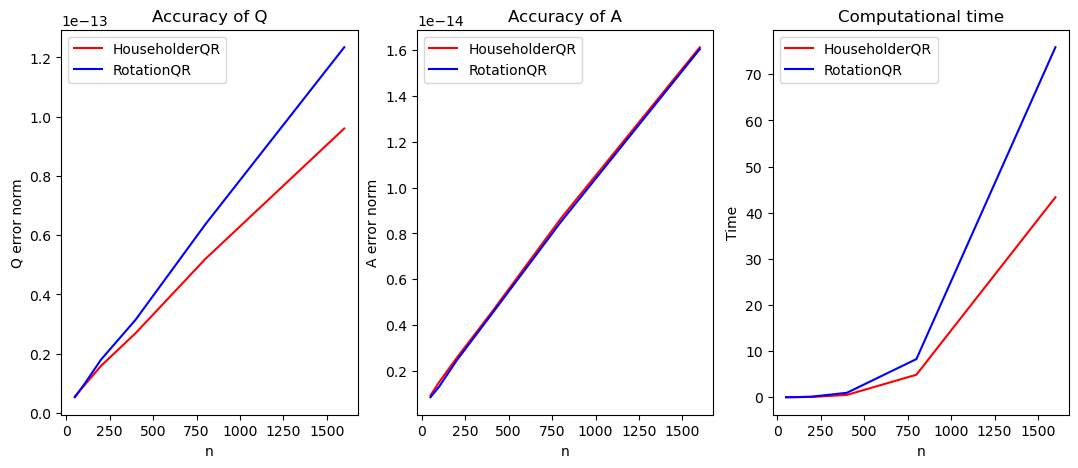

In [23]:
# import matplotlib for analysis using figures
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# from week 5 lecture notebook
# Test the algorithms on problems with increasing size n, up to 1600.

# set number of datapoints
m = 6

# initialise numpy arrays for all variables
n = np.zeros(m)
err_qh = np.zeros(m)
err_qr = np.zeros(m)
err_ah = np.zeros(m)
err_ar = np.zeros(m)
t1_Hk = np.zeros(m)
t1_Rk = np.zeros(m)

# create figure and axes, 3 subplots on the same line of the same size
fig, ax = plt.subplots(1, 3, figsize=(13,5))

# loop over dimensions n = 50 to n = 1600, increasing in powers of 2
for k in range(0, m):
    
    # set dimension
    n[k] = 50 * 2 ** k
    dim = int(n[k])

    # create a random matrix
    A = randsvd(dim, 10 ** 6)

    # define Q, R for householder reflection and rotation
    QH, RH = HouseholderQR(A)
    QR, RR = RotationQR(A)

    # error in Q for hh reflection and rotation
    err_qh[k] = np.linalg.norm(QH.T @ QH - np.eye(dim))
    err_qr[k] = np.linalg.norm(QR.T @ QR - np.eye(dim))

    # error in A for hh reflection
    err_ah[k] = np.linalg.norm(QH @ RH - A)
    err_ar[k] = np.linalg.norm(QR @ RR - A)

    # Compute time taken to find decompositions
    t0_Hk = time.time()
    HouseholderQR(A)
    t1_Hk[k] = time.time() - t0_Hk

    t0_Rk = time.time()
    RotationQR(A)
    t1_Rk[k] = time.time() - t0_Rk

    # print in a table
    print('Dimension: n = {}\n\n'
          'Error in Q using Hk: {:.5g}\n'
          'Error in Q using Rk: {:.5g}\n\n'
          'Error in A using Hk: {:.5g}\n'
          'Error in A using Rk: {:.5g}\n\n'
          'Time taken for Hk: {:.5g}\n'
          'Time taken for Rk: {:.5g}\n\n'.format(dim, err_qh[k], err_qr[k], err_ah[k], err_ar[k], t1_Hk[k], t1_Rk[k]))

# now from the arrays we created in the loop above, plot it on the figures

# plotting the accuracy of Q against dimension of A using line graphs
ax[0].plot(n, err_qh, 'r-', label='HouseholderQR')
ax[0].plot(n, err_qr, 'b-', label='RotationQR')

# label the axes
ax[0].set_xlabel('n')
ax[0].set_ylabel('Q error norm')

# add a title
ax[0].set_title('Accuracy of Q')

# add a legend
ax[0].legend()

# repeat the same process with the accuracy of A for increasing dimension of A
ax[1].plot(n, err_ah, 'r-', label='HouseholderQR')
ax[1].plot(n, err_ar, 'b-', label='RotationQR')
ax[1].set_xlabel('n')
ax[1].set_ylabel('A error norm')
ax[1].set_title('Accuracy of A')
ax[1].legend()

# repeat the same process with the time taken to do each decomposition for increasing dimension
ax[2].plot(n, t1_Hk, 'r-', label='HouseholderQR')
ax[2].plot(n, t1_Rk, 'b-', label='RotationQR')
ax[2].set_xlabel('n')
ax[2].set_ylabel('Time')
ax[2].set_title('Computational time')
ax[2].legend()

plt.show()

Rotation QR is much more accurate in computing Q, as it only affects two elements of A at a time, so erros don't propagate as easily. HouseholderQR transforms entire columns at a time, so the errors accumulate more.

The accuracy of both algorithms remains the same for any matrix dimension below 1600.

However, RotationQR is much more expensive as it has many more FLOPS. This becomes more and more significant as the dimension of A increases, as shown on the figure.

___

**2(a)** 

To minimise, we take the partial derivative wrt each entry of A.

Let $g(\A) = \sum_{i=1}^m \| \A \x^{(i)} - \y^{(i)} \|^2 = \sum_{i=1}^m ((\A \x^{(i)})^\T (\A \x^{(i)}) - y^{(i)\T}(\A \x^{(i)}) - (\A \x^{(i)})^\T \y^{(i)} + \y^{(i) \T} \y^{(i)})$


We start with the term $(\A \x^{(i)})^\T (\A \x^{(i)}) = \sum_{l} (\A \x)_l (\A \x)_l = \sum_{l} (\sum_{k}a_{lk} x_k) (\sum_{m}a_{lm} x_m) = \sum_{k,l,m}(a_{lk}a_{lm} x_k x_m)$

Now taking derivative

$\partial / \partial a_{pq} (\sum_{k,l,m}(a_{lk}a_{lm} x_k x_m)) = \sum_{k,l,m}((a_{lm}\partial a_{lk}/ \partial a_{pq} + a_{lk} \partial a_{lm}/ \partial a_{pq}) x_k x_m)$

$= \sum_{k,l,m}((a_{lm} \delta_{lp} \delta_{kq} + a_{lk} \delta_{lp} \delta_{mq}) x_k x_m)$

$= \sum_{k,m,p,q}(a_{pm} x_q x_m + a_{pk} x_k x_q)$

$= 2 \A \x \x^\T$

Now consider the term $\y^\T (\A \x) = \sum_{k,l}(a_{lk} x_k y_l)$

$\partial / \partial a_{pq} \sum_{k,l}(a_{lk} x_k y_l) = \y \x ^\T$

and then $(\A \x) ^\T \y = \sum_{k,l}(a_{lk} x_k y_l)$,

so $\partial / \partial a_{pq} \sum_{k,l}(a_{lk} x_k y_l) = \y \x ^\T$

and finally, $\partial / \partial a_{pq} (\y ^ \T \y) = 0$


Putting it all together, we have

$ \partial g(\A) / \partial a_{pq} = \partial / \partial a_{pq} (\sum_{i=1}^m ((\A \x^{(i)})^\T (\A \x^{(i)}) - y^{(i)\T}(\A \x^{(i)}) - (\A \x^{(i)})^\T \y^{(i)} + \y^{(i) \T} \y^{(i)})$

$= \sum_{i=1}^m \A \x^{(i)} \x^{(i) \T} - \y^{(i)} \x^{(i) \T}$

For $\A$ to minimise the LSQ estimate, we want $ \partial g(\A) / \partial a_{pq} = 0$

So $\sum_{i=1}^m \A \x^{(i)} \x^{(i) \T} = \y^{(i)} \x^{(i) \T}$, i.e. $\A \X = \Y$, as required. 


**2(b)**

In [24]:
import numpy as np
import time

def LSQMatrix(listPairs):
    '''
    function to find an estimate for the solution A for y(i) = A @ x(i), where x(i) and y(i)
    are a set of paired datapoints

    input:
    listPairs, an array of paired data (x(i), y(i)) with i = 1,...,m
    
    output:
    Arec, least squares estimate for A
    '''
    
    # Solve a least squares problem
    # Using Week 8 Notebook

    # initialise x and y
    x = []
    y = []

    # loop over listPairs to extract the values of x and y
    for [a,b] in listPairs:

        # create two lists for x and y values 
        x.append(a)
        y.append(b)

    # make these lists into arrays
    x = np.asarray(x)
    y = np.asarray(y)

    # dimension of each vector x(i)
    n = len(x[0])

    # number of datapoints of x and y
    m = len(x)

    # initialise matrices of the estimate of A, and X and Y
    Arec = np.ones((n,n))
    X = np.zeros((n,n))
    Y = np.zeros((n,n))

    # loop over the datapoints x and y to find X and Y
    for i in range (0, m-1):

        # perform the summation of outer products

        # xx.T
        X += np.outer(x[i],x[i])

        # yx.T
        Y += np.outer(y[i],x[i])

    # Solving AX=Y using the inbuilt function
    # so we need it in the form Ax=b when x is the unknown
    # taking the transpose, we have X.T @ A.T = Y.T, which is of the right form
    AT = np.linalg.solve(X.T, Y.T)

    # now take the transpose of the solution above to give our estimate for A
    Arec = AT.T

    # return the least-squares estimate for A
    return Arec

def noisyPairs(A,m,eps):
    # Generates pairs (x^i,y^i) with y^i = A x^i + noise
    # m is number of pairs, eps is noise amplitude
    n = A.shape[0]
    listPairs = []
    for i in range(m):
        x = np.random.randn(n)
        y = A @ x + eps * np.random.randn(n)
        listPairs.append([x,y])
    return listPairs

A = np.array([[2,-3,3],[4,-2,2],[-1,1,5]]) # Example matrix
listPairs = noisyPairs(A,30,0.3)

Arec = LSQMatrix(listPairs)
print('Generating A\n', A, '\n')
print('Recovered A\n', Arec, '\n')
print('Recovery error = ',np.linalg.norm(A-Arec,2))

Generating A
 [[ 2 -3  3]
 [ 4 -2  2]
 [-1  1  5]] 

Recovered A
 [[ 2.01475967 -3.05262501  2.99197042]
 [ 3.95287029 -1.96243793  2.01622085]
 [-0.99093247  0.97139722  4.90160363]] 

Recovery error =  0.11367776605802837


**2(c)**

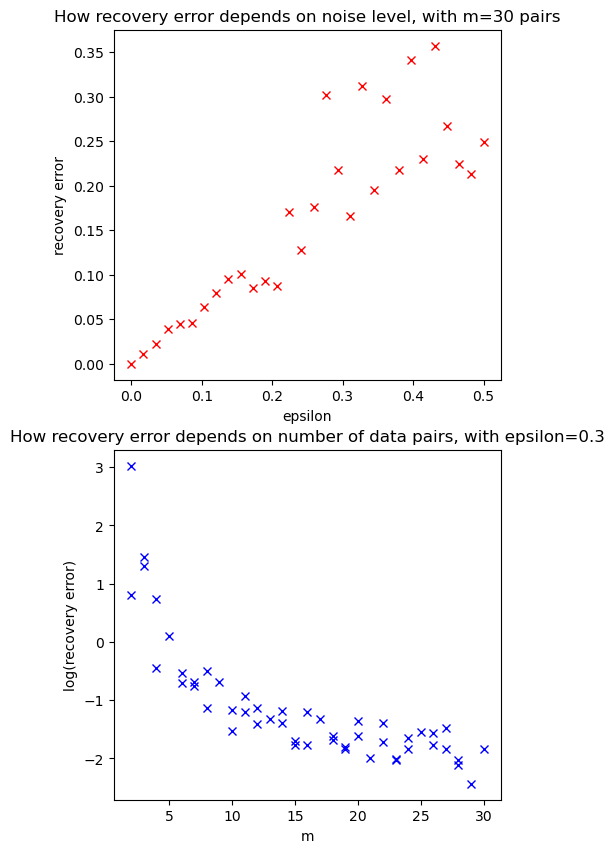

In [25]:
# import matplotlib for analysis using figures
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# initialise a random, reasonably sized array
A = np.random.randn(3,3)

# create an array of values for epsilon and m
epsvals = np.linspace(0, 0.5, 30)
mvals = np.linspace(2,30).astype(int)

# create two subplots
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

# first, loop over our values of epsilon
for i in range (len(epsvals)):

    # select a single value of epsilon to evaluate the error
    eps = epsvals[i]

    # create listPairs corresponding to this epsilon, keeping m constant
    listPairs_eps = noisyPairs(A, 30, eps)

    # find the LSQ estimate
    Arec_eps = LSQMatrix(listPairs_eps)

    # find 2norm of the error in Arec
    receps_err = np.linalg.norm(A - Arec_eps)

    # plot this value of epsilon against the corresponding error on the first plot
    ax[0].plot(eps, receps_err, 'rx')
    ax[0].set_xlabel('epsilon')
    ax[0].set_ylabel('recovery error')
    ax[0].set_title('How recovery error depends on noise level, with m=30 pairs')

# now loop over
for i in range (len(mvals)):
    m = mvals[i]
    listPairs_m = noisyPairs(A, m, 0.3)
    Arec_m = LSQMatrix(listPairs_m)
    recm_err = np.linalg.norm(A - Arec_m)
    ax[1].plot(m, np.log(recm_err), 'bx')
    ax[1].set_xlabel('m')
    ax[1].set_ylabel('log(recovery error)')
    ax[1].set_title('How recovery error depends on number of data pairs, with epsilon=0.3')

plt.show()

**3(a)**

Because $\Q$ minimises the constrained LSQ problem, we have shown from **2(a)** that Q satisfies $\sum_{i=1}^m \Q \x^{(i)} \x^{(i) \T} = \sum_{i=1}^m \y^{(i)} \x^{(i) \T}$

In order to maximise $\sum_{i=1}^m {\y^{(i)}}^\T \Q \x^{(i)}$, we find the partial derivative in terms of $q_{pr}$, the elements of $\Q$.

We can write $\y ^\T (\Q \x) = \sum_{l} \y_l (\Q \x)_l = \sum_{k,l} q_{lk} y_l x_k$

And taking pd: $\partial / \partial q_{pr} (\y ^\T (\Q \x) = \sum_{k,l} \delta_{lp} \delta_{kr} y_l x_k = \sum_{p,r} y_p x_r = \y \x ^ \T $

So $\Q$ maximises $\sum_{i=1}^m {\y^{(i)}}^\T \Q \x^{(i)}$ when $\sum_{i=1}^m \y^{(i)} \x^{(i) \T} = 0$

And from **2(a)**, we can also see that $\nabla \sum_{i=1}^m {\y^{(i)}}^\T \Q \x^{(i)} = \sum_{i=1}^m \Q \x^{(i)} \x^{(i) \T} $.

So Q maximises $\sum_{i=1}^m {\y^{(i)}}^\T \Q \x^{(i)}$.

**3(b)**

We are trying to show that $\Q$ solves $\Q \mathbf{S} = \Y$. We already know:
- $\Q$ minimises $\sum_{i=1}^m \| \Q \x^{(i)} - \y^{(i)} \|^2$,
- $\Q$ solves $\Q\X = \Y$, $\X$ symmetric,
- $\Q$ maximises $\sum_{i=1}^m {\y^{(i)}}^\T \Q \x^{(i)}$.

So in order for $\Q$ to satisfy $\Q \mathbf{S} = \Y$, $\Q$ must maximise $\sum_{i=1}^m {\y^{(i)}}^\T \Q \x^{(i)}$.

Let $f(\Q) = \sum_{i=1}^m {\y^{(i)}}^\T \Q \x^{(i)}$. Our constraint is $g(\Q) = \Q^\T \Q - \mathbf{I}$.

We can construct a lagrangian function:

$L(\Q, \lambda_{kl}) = f(\Q) + \lambda_{kl} g(\Q)$

$= \sum_{i=1}^m {\y^{(i)}}^\T \Q \x^{(i)} + \sum_{k=1}^n \sum_{l=1}^n \lambda_{kl} (\Q^\T \Q - \mathbf{I})_{kl}$

We want to extremise wrt $q_{pr}$ and $\lambda_{pr}$ so first:

$\partial L/ \partial q_{pr} = \partial / \partial q_{pr} (\sum_{i=1}^m {\y^{(i)}}^\T \Q \x^{(i)}) + \partial / \partial a_{pq} (\sum_{k=1}^n \sum_{l=1}^n \lambda_{kl} (\Q^\T \Q - \mathbf{I})_{kl})$

$= \Q \X + \sum_{k,l} \lambda_{kl} \partial / \partial q_{pr}(q_lkq_kl - \delta_{kl})$ using **3(a)**

$= \Y + \sum_{k,l} \lambda_{kl}(q_{kl} \delta_{lp} \delta_{kr} + q_{lk} \delta_{kp} \delta_{lr} - \delta_{kl})$

$= \Y - \Q \mathbf{S}$ where $\Y - \Q \mathbf{S}$ is a symmetric matrix.

and so $\Y = \Q \mathbf{S}$.

$\partial L/ \partial \lambda_{pr} = 0 + \partial / \partial \lambda_{pr}(\sum_{k=1}^n \sum_{l=1}^n \lambda_{kl} (\Q^\T \Q - \mathbf{I})_{kl})$

$= \sum_{k,l} \delta_{kp} \delta_{lr}(q_{lk} q_{kl} - \delta_{kl})$

$= q_{rp} q_{pr} - \delta_{pr}$

$= \Q^\T \Q - \mathbf{I}$

Therefore $\Q^\T \Q = \mathbf{I}$, and we can conclude that $\Q \mathbf{S} = \Y$ and $\Q$ is orthogonal.

**3(c)**

$\Q$ solves the constrained LSQ problem, so it satisfies $\Q \X = \Y$, and we also know that $\Q^\T \Q = \mathbf{I}$.

Multiplying both sides by $\Q^\T$, we get  $\Q \X \Q^\T = \Y \Q^\T$.

Taking transpose of $\Q \X = \Y$, we get $\X^\T \Q^\T = \Y^\T$.

Now, multiplying both sides by $\Q$, we get $\Q \X^\T \Q^\T = \Q \Y^\T$.

$\X$ is defined by $\X = \sum_{i=1}^m \x^{(i)} {\x^{(i)}}^\T$, so $\X = \X ^\T$

$\Q \X \Q^\T = \Q \X^\T \Q^\T$

Which implies $\Y \Q^\T = \Q \Y^\T$, as required.

**3(d)**

1. From the definition, we have $\Q_\infty^\T \Q_\infty = \lim_{k\to \infty} \Q_k ^\T \Q_k$ and the iteration converges; as $k \to \infty$, $\Q_k \to \Q$.

   $\Q$ is an orthogonal matrix, as proven above.

   $\Q_\infty^\T \Q_\infty = \lim_{k\to \infty} \Q_k ^\T \Q_k = \Q^\T \Q = \mathbf{I}$.

2. We perform induction.

   Taking the first case, with $\Q_0$:

   $\Q_0 = \Y$ so we can find
   
   $\Y \Q_0^\T = \Y \Y^\T$
   
   $\Q_0 \Y^\T = \Y \Y^\T$ so the statement is true for $\Q_0$.

   Now we assume the statement is true for any $\Q_k$, and try $\Q_{k+1}$:

   $\Y \Q_{k+1}^\T = \tfrac{1}{2} \left(\Y \Q_k^\T + \Y \Q_k^{-1} \right)$

   $\Q_{k+1}^\T \Y = \tfrac{1}{2} \left(\Q_k \Y^\T + \Q_k^{-\T} \Y^\T \right)$

   $= \tfrac{1}{2} \left(\Y \Q_k^\T + \Q_k^{-\T} \Y^\T \right)$

   $= \tfrac{1}{2} \left(\Y \Q_k^\T + \Q_k^{-\T} (\Q_k^{-1} \Y \Q_k^\T) \right)$

   $ = \tfrac{1}{2} \left(\Y \Q_k^\T + \Y \Q_k^\T \right)$

   and because $\Q$ orthogonal, $\Q_k^\T = \Q_k^{-1}$. So we can conclude that $\Y \Q_{k+1}^\T = \Q_{k+1}^\T \Y$ if true for $\Q_k$.

   We have shown true for $\Q_0$, and if true for any $\Q_k$, it is also true for $\Q_{k+1}$.

   Now we can take limits:

   $\lim_{k\to \infty} \Y \Q_k ^\T = \lim_{k\to \infty} \Q_k \Y^\T \implies \Y \Q_\infty ^\T = \Q_\infty  \Y^\T$, as required.   

**3(e)** 

In [26]:
import numpy as np

def LSQMatrixQ(listPairs, eps):

    # Solve a least squares problem
    # Using Week 8 Notebook

    # first find the matrix Y
    # initialise x and y
    x = []
    y = []

    # loop over listPairs to extract the values of x and y
    for [a,b] in listPairs:

        # create two lists of x and y values
        x.append(a)
        y.append(b)

    # make these lists into arrays
    x = np.asarray(x)
    y = np.asarray(y)

    # dimension of each vector x(i)
    n = len(x[0])

    # number of datapoints of x and y
    m = len(x)

    # we only need the matrix Y this time
    Y = np.zeros((n,n))

    # iterate over the datapoints x(i), y(i)
    for i in range (0, m-1):

        # perform summation of outer products, yx.T
        Y += np.outer(y[i],x[i])

    # set Q0 = Y
    Qk = np.copy(Y)

    # initialise the number of iterations and the initial residual norm
    k = 0
    error = np.linalg.norm(Qk.T @ Qk - np.eye(n))

    # loop until exit condition is satisfied
    while error > eps:

        # update k
        k +=1

        # compute Q_k+1 as in the formula above
        Qk = 1/2 * (Qk + np.linalg.inv(Qk.T))

        # update values
        error = np.linalg.norm(Qk.T @ Qk - np.eye(n))

    # final estimate for Q that satisfies exit condition
    Q = np.copy(Qk)

    # return approximation for the least squares estimate for Q
    return Q

A, _ = np.linalg.qr(np.array([[2,-3,3],[4,-2,2],[-1,1,5]]))
listPairs = noisyPairs(A,30,0.3)

Q = LSQMatrixQ(listPairs,1e-6)
print('Generating A\n', A, '\n')
print('Recovered Q\n', Q, '\n')
print('Recovery error = ',np.linalg.norm(A-Q,2))

Generating A
 [[-0.43643578  0.86692145  0.24077171]
 [-0.87287156 -0.47286624  0.12038585]
 [ 0.21821789 -0.15762208  0.96308682]] 

Recovered Q
 [[-0.43180401  0.87981735  0.19866368]
 [-0.86658422 -0.46576287  0.17915568]
 [ 0.25015436 -0.09479863  0.96355385]] 

Recovery error =  0.07235910591700877


**3(f)**

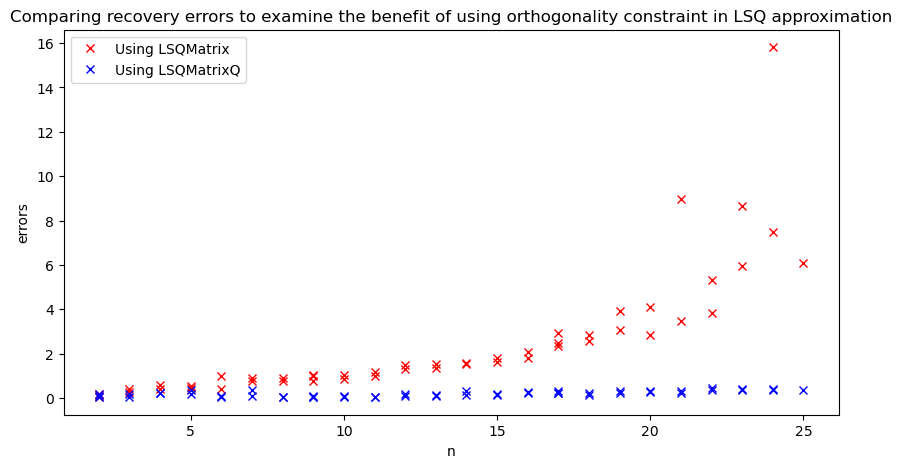

In [27]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# initialise the size of the matrices
nvals = np.linspace(2,25).astype(int)

# initialise arrays to contain errors
err1, err2 = np.zeros(len(nvals)), np.zeros(len(nvals))

# create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# loop over the different matrix sizes
for i in range (len(nvals)):

    # select a dimension
    n = nvals[i]

    # create a random matrix of this dimension to test on
    B = np.random.randn(n,n)

    # perform QR decomposition of this matrix to use the orthogonal A
    A, _ = np.linalg.qr(B)

    # create pairs of data with noise using the above function noisyPairs
    listPairs = noisyPairs(A,30,0.3)
    

    # first, find estimate Q1 from LSQMatrix, based on the set of data listPairs
    Q1 = LSQMatrix(listPairs)

    # compute the error and put it in the array
    err1[i] = np.linalg.norm(Q1.T @ Q1 - np.eye(n))


    # find estimate Q2 from LSQMatrixQ, based on listPairs
    Q2 = LSQMatrixQ(listPairs, eps)

    # compute the error and put it in the array
    err2[i] = np.linalg.norm(Q2.T @ Q2 - np.eye(n))


# plot err1 against the size of the matrix A
ax.plot(nvals, err1, 'rx', label='Using LSQMatrix')

# plot err2 against size of A
ax.plot(nvals, err2, 'bx', label='Using LSQMatrixQ')

# label the plot
plt.xlabel('n')
plt.ylabel('errors')
plt.title('Comparing recovery errors to examine the benefit of using orthogonality constraint in LSQ approximation')
plt.legend()

plt.show()

Using orthogonality constraint in calculating Q using LSQMatrixQ greatly decreases recovery errors. This is seen as the recovery error stays below 2, even as the size of A increases. This is not the case for the algorithm LSQMatrix, which does not include an orthogonality constraint in every iteration. As a result, the recovery error increases with matrix size, as the error in $\|\Q^\T \Q - \mathbf{I}\|$ only increases at each iteration, so each $\Q_k$ is less and less orthogonal.

___